In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
def loadGloveModel(gloveFile):
    print "Loading Glove Model"
    f = open(gloveFile,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print "Done.",len(model)," words loaded!"
    return model

model=loadGloveModel('/home/naveen/Desktop/NLP_project/april_finalweek/w2v100.txt')

Loading Glove Model
Done. 274930  words loaded!


In [3]:
texts = open("/home/naveen/Desktop/NLP_project/april/data_csv/text.txt", 'r+')
labels= open("/home/naveen/Desktop/NLP_project/april/data_csv/label_num.txt", 'r+')


In [4]:
b = (labels.read().split('\n'))

In [5]:
type(b)

list

In [6]:
t=texts.read()
T = t.splitlines()

In [7]:
text=[]
[text.append(model[i])for i in T]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [8]:
np.shape(text)

(451511, 100)

In [9]:
len(b)

451512

In [10]:
len(T)

451511

# test label creation

In [11]:
X_test,testlabel=T[421511:451511],b[421511:451511]

# change the range of text

In [12]:
#X_test,testlabel=T[371511:451511],b[371511:451511]

# creating csv



In [13]:
testlabel=np.array(testlabel)
test_num_int =testlabel.astype(np.int)

# -------------------------

In [14]:
X_text=[]
[X_text.append(model[i])for i in T[421511:451511]]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# train and crossvalidation creation

In [15]:
#textList,labelList=T[0:421510],b[0:421510]
textList,labelList=T[0:371511],b[0:371511]


In [16]:
#len_train=int(0.8*len(textList))
len_train=int(0.9*len(textList))

x_train=[]
[x_train.append(model[i])for i in textList[0:len_train]]
x_test=[]
[x_test.append(model[j])for j in textList[len_train:]]
np.shape(x_test)

(37152, 100)

In [17]:
len(T)

451511

In [18]:
np.shape(x_train),np.shape(x_test)

((334359, 100), (37152, 100))

In [19]:
y_train = labelList[0:len_train]
y_test = labelList[len_train:]

In [20]:
len(y_train),len(y_test)

(334359, 37152)

In [21]:
from keras.utils import np_utils
y_train1 = np_utils.to_categorical(y_train) #train

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
y_test1 = np_utils.to_categorical(y_test) #cross validation
#testlabel1=np_utils.to_categorical(testlabel)#test
testlabel2=np.array(testlabel)

In [23]:
type(y_test1),type(testlabel2)

(numpy.ndarray, numpy.ndarray)

In [24]:
from __future__ import print_function
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
trainX = np.array(x_train)

In [26]:
X_train = np.reshape(trainX,(trainX.shape[0], 1, trainX.shape[1]))
# X_test = np.reshape(testT, (testT.shape[0], 1, testT.shape[1]))

In [27]:
X_train.shape

(334359, 1, 100)

In [28]:
x_text=np.array(X_text)
test_X = np.reshape(x_text,(x_text.shape[0], 1, x_text.shape[1]))

In [29]:
test_X.shape

(30000, 1, 100)

In [30]:


print('Build model...')
# hidden_dims=128
# nb_filter = 32
# filter_length =3 
# embedding_vecor_length = 128
batch_size=64
model = Sequential()
# model.add(Embedding(max_features, embedding_vecor_length))

model.add(LSTM(128,input_dim= 100))
model.add(Dropout(0.1))
model.add(Dense(27))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="logs100/lstm_layer/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
model.fit(X_train, y_train1, batch_size=batch_size, epochs=5, callbacks=[checkpointer])
model.save("logs100/lstm_layer/lstmlayer_model.hdf5")

Build model...


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, input_shape=(None, 100...)`
  if sys.path[0] == '':


Epoch 1/5
334359/334359 [==============================] - 49s 147us/step - loss: 0.5268 - acc: 0.8473
Epoch 2/5
  1280/334359 [..............................] - ETA: 47s - loss: 0.4100 - acc: 0.8742

/usr/local/lib/python2.7/dist-packages/keras/callbacks.py:435: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


334359/334359 [==============================] - 43s 128us/step - loss: 0.4026 - acc: 0.8762
Epoch 3/5
334359/334359 [==============================] - 43s 128us/step - loss: 0.3783 - acc: 0.8822
Epoch 4/5
334359/334359 [==============================] - 43s 129us/step - loss: 0.3643 - acc: 0.8858
Epoch 5/5
334359/334359 [==============================] - 43s 130us/step - loss: 0.3548 - acc: 0.8887


# testing

In [31]:

print('testing model...')
# hidden_dims=128
# nb_filter = 32
# filter_length =3 
# embedding_vecor_length = 128

model = Sequential()
# model.add(Embedding(max_features, embedding_vecor_length))

model.add(LSTM(128,input_dim= 100))
model.add(Dropout(0.1))
model.add(Dense(27))
model.add(Activation('softmax'))
files = []
acc =[]
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
import os
files = []
for file in os.listdir("logs100/lstm_layer/"):
    print(file)
    model.load_weights("logs100/lstm_layer/"+file)
    y_pred = model.predict_classes(test_X)
    #model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    #l, a = model.evaluate(X_test, testlabel)
    #print(file)
    #print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
    #print("---------------------------------------------------------------------------------")
    acc.append(accuracy_score(testlabel2, y_pred))



testing model...


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, input_shape=(None, 100...)`
  # This is added back by InteractiveShellApp.init_path()


lstmlayer_model.hdf5


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:181: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [38]:
model.load_weights("logs100/lstm_layer/" +files[acc.index(max(acc))])
y_pred = model.predict_classes(test_X)    
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred , average="macro")
precision = precision_score(y_true, y_pred , average="macro")
f1 = f1_score(y_true, y_pred, average="macro")
print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("recall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

IndexError: list index out of range

In [33]:
y_pred


array([ 5,  5,  1, ..., 13, 11,  1])

In [34]:
y_true =testlabel2.astype(np.int)

In [35]:
type(y_pred),type(testlabel2)

(numpy.ndarray, numpy.ndarray)

In [36]:
y_pred

array([ 5,  5,  1, ..., 13, 11,  1])

In [37]:
testlabel2

array(['5', '14', '1', ..., '13', '11', '1'], dtype='|S2')

# Confusion matrix 

In [19]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', testlabel[0:50])
print('Pred:', y_pred[0:50])

True: ['5' '14' '1' '1' '0' '2' '13' '21' '5' '20' '11' '13' '19' '11' '11' '1'
 '11' '1' '11' '11' '1' '11' '1' '0' '11' '11' '1' '11' '1' '11' '11' '0'
 '13' '13' '19' '21' '5' '1' '11' '5' '1' '11' '5' '1' '11' '21' '5' '11'
 '12' '1']


NameError: name 'y_pred' is not defined

In [62]:
print(metrics.confusion_matrix(y_true, y_pred))

[[1089    0    0    0    0    0    0    0    0    0    0    1    0    0
     1    0    0    0    0    0    0    0    0    0    0    0]
 [   0 1275    0    0    0    0    1    0    0    0    0  131    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [  34    0 2560    0    0    5    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0   14    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0   67   30    1    0    0    0    0    5    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 4074   12    0    0    0    0    1    0    0
     4    0    0    3    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    2 2287    1    0    0    0  506   14    2
    12    0    0    0    0    1    2   53    0    0    0    0]
 [   0    0    0    0    0    0    0   38    0    0    

In [70]:
from sklearn.metrics import classification_report
#y_true = [0, 1, 2, 2, 2]
#y_pred = [0, 0, 2, 2, 1]
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=None))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1091
          1       0.96      0.90      0.93      1407
          2       1.00      0.98      0.99      2600
          3       1.00      1.00      1.00        14
          4       0.98      0.48      0.64       103
          5       0.90      0.99      0.95      4095
          6       0.91      0.77      0.83      2880
          7       0.90      0.72      0.80        53
          8       1.00      0.88      0.93         8
          9       0.00      0.00      0.00        45
         10       1.00      1.00      1.00       129
         11       0.80      0.97      0.87      8830
         12       0.76      0.30      0.43       525
         13       0.94      0.78      0.85      2440
         14       0.94      0.85      0.89      1003
         15       0.56      0.68      0.61        22
         16       0.67      1.00      0.80         2
         17       0.88      0.09      0.16   

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [81]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#cnf_matrix = confusion_matrix(test['Rating'], pred_5)

cnf_matrix=metrics.confusion_matrix(y_true, y_pred)

Confusion matrix, without normalization
[[1089    0    0    0    0    0    0    0    0    0    0    1    0    0
     1    0    0    0    0    0    0    0    0    0    0    0]
 [   0 1275    0    0    0    0    1    0    0    0    0  131    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [  34    0 2560    0    0    5    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0   14    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0   67   30    1    0    0    0    0    5    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 4074   12    0    0    0    0    1    0    0
     4    0    0    3    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    2 2287    1    0    0    0  506   14    2
    12    0    0    0    0    1    2   53    0    0    0    0]
 [   0    0    

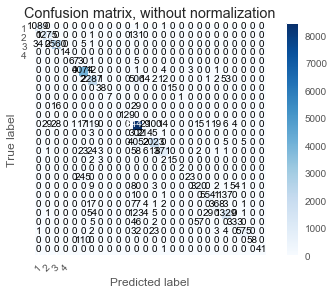

In [82]:

plot_confusion_matrix(cnf_matrix,classes=['1','2','3','4'],
                      title='Confusion matrix, without normalization')

In [18]:
sum=0
for i in range(26):

    print(metrics.confusion_matrix(y_true, y_pred)[i][i])
    sum=sum+metrics.confusion_matrix(y_true, y_pred)[i][i]
    print 'diagonal elements are '+ sum

NameError: name 'metrics' is not defined

import re
j,k=0,[]
for i in T:
    if re.search("E125", i):
        print i
        if i not in k:
            k.append(i)
        j+=1
print j